### Classificação - Orçamento profissionais de Design
Utilizando algoritmo SCV\
StandartScaller\
Plotagem de Boundary limits\
A base de dados descreve projetos de design finalizados ou não, o preço e a hora do profissional.
Podemos usar o modelo para indicar a determinado cliente, quanto sua proposta está acima ou abaixo, e as chances do projeto ser ou não executado.


In [1]:
import pandas as pd
import numpy as np
#!pip install seaborn==0.9.0 (comando para atualizar versoes)

Carregando base de dados

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
#renomeando colunas para o portugues
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished': 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
#Este nome de coluna "não finalizado"ficou estranho
#Criando nova coluna "finalizado"e invertendo os valores 0 e 1

troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### Plot das horas esperadas e do preço

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

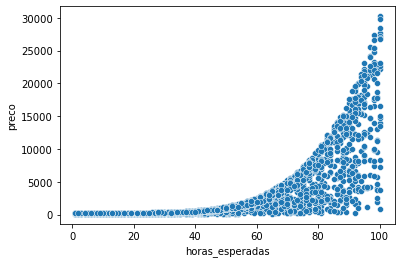

In [5]:
# x = horas esperadas
# y = preço

import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

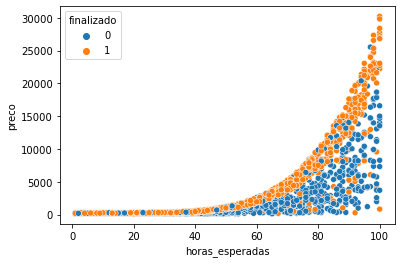

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", hue= "finalizado", data=dados)

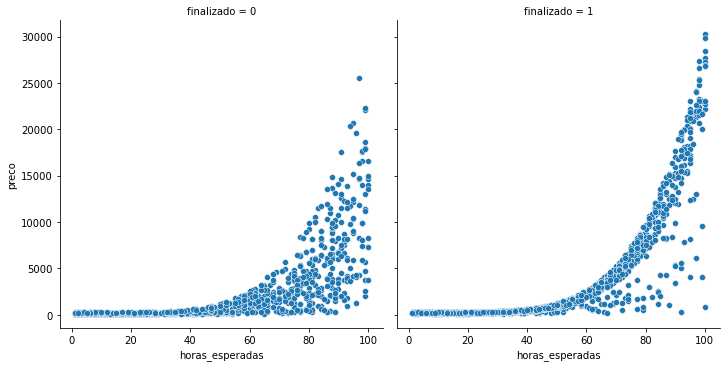

In [7]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

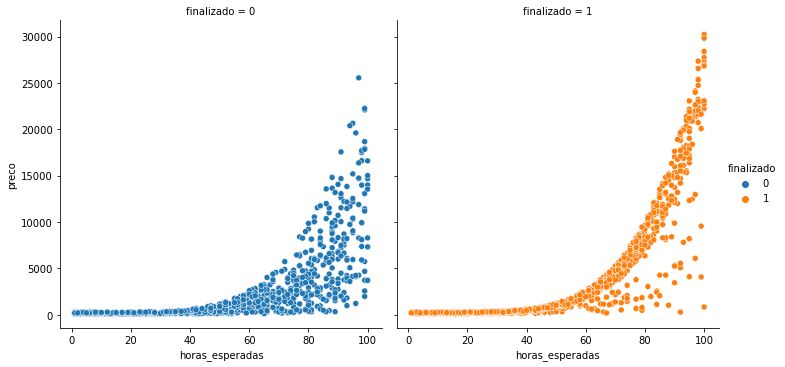

In [8]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

### Modelagem - Suport Vector Classification (SVC)

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados ['finalizado']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma= 'auto')
#modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


#### Teste de acurácia

In [11]:
#Vou criar um modelo base, chutando todos os resultados como "finalizados" 
previsoes_thais = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_thais) * 100
print("A acurácia da Thais foi %.2f%%" % acuracia)

A acurácia da Thais foi 52.59%


Ou seja, chutando todos como "finalizados"tive uma acuracia de 53,59%, então de acordo com o modelo de base, a modelagem anterior está ruim.

### Analise visual - Plotagem de Boundary

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

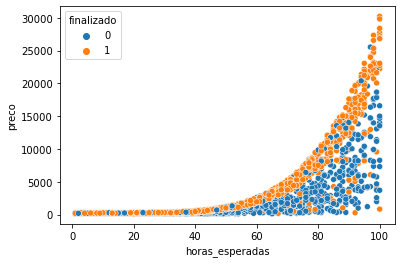

In [12]:
sns.scatterplot(x="horas_esperadas", y="preco", hue= "finalizado", data=dados)

In [13]:
#Do conjunto te teste_x e teste_y, coleto o valor minimo e o máximo
#Ao printar, percebo que o "x" vai de 1-100 e o "y" vai de 101 a 27738
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print (x_min, x_max, y_min, y_max)

1 100 100 30223


In [14]:
#Definindo quantos pixels haverá em cada dimensão 
#Multiplicaremos 100 x 100 ou seja 100 pixel para cada dimensao (altura e largura)
#Entre o x_min e o x_max, cada espaço tera o tamanho maximo do grafico dividido pelo total de pixels
#No print veremos a divisão proporcional no eixo x
pixels = 100
np.arange(x_min, x_max, (x_max - x_min) / pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [15]:
#Mesmo procedimento para o eixo y
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [16]:
'''
Criando um grid entre os dois eixos, multiplicando as opções de acordo com as diferentes 
possibilidades de custo de projeto e de tempo de execução
'''
#Esta parte é só uma demonstração, não é efetiva pois repete o eixo x e o eixo y 100 vezes, ele não mesclou
xx , yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [17]:
#Vamos fazer a concatenação dos elementos usando o ravel
#procedimento para xx e yy
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [18]:
#Concatenando o xx e yy atraves do método np.c_
#Esta operação irá devolver os pontos
#Ao printar, observamos a concatenação com os devidos pares em cada eixo

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [19]:
#A partir do modelo criado faremos previsões para todos estes pontos
#Como resultado, teremos uma série de numeros que são as classificaçoes (chamaremos de z)

Z = modelo.predict(pontos)

In [20]:
#Verificando o tamanho do array
Z = modelo.predict(pontos)
Z.shape

(10000,)

In [21]:
xx.shape

(100, 100)

In [22]:
#Ajustando a dimensão do array do Z (1000) de acordo com o xx
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

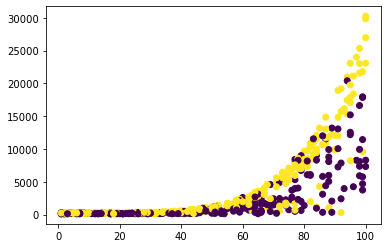

In [23]:
#Plotando os dados
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y)

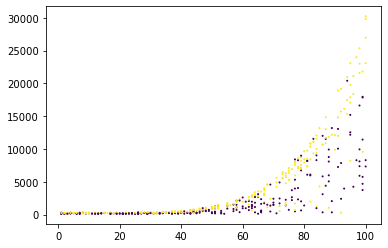

In [24]:
#Melhorando a visualização
# S é o tamanho dos pontos

import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y, s=1)

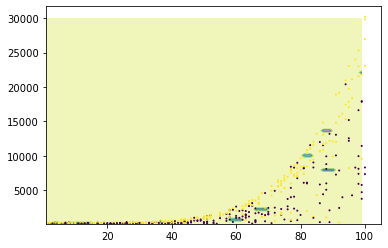

In [25]:
#Diferenciando as cores de acordo com a classificação (0 ou 1)
#Adicionando cor diferente para observarmos a curva que separa as duas classificações

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [27]:
#Alterando o valor da SEED para 5, para observarmos a curva de separação (decision boundary)
#Este algoritmo utilizado só aprende a linha reta, oq neste caso não serve para classificação

### Modelagem utilizando o Standart Scale

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [32]:
''''
Utilizando o 'svm.SVC'para gerar o gráfico com os pontos do eixo X, 
e mostra quais pontos tem alguma proximidade.
Ele afasta os pontos do eixo X (linha)
'''

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                               stratify = y)
print("Treinaremos com. %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

#Transformando a escala dos dados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#Com os dados reescalados, a acurácia foi para 66.85%

Treinaremos com. 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


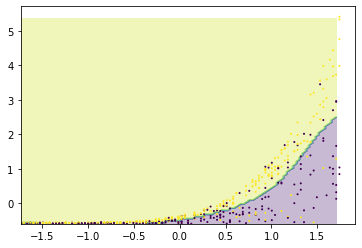

In [36]:
#Visualizando o gráfico após a reescalada

#Atribuindo os valores aos eixos

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z= modelo.predict(pontos)
Z= Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)